In [40]:
import pandas as pd
import numpy as np
import scipy as sp
import plotly as py
import datetime as dt
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import seaborn as sns
import random as rd

# LAST DAY OF DATA

In [4]:
last_date=dt.date(2020,3,16)

# Data Import

In [5]:
daterange = pd.date_range(dt.date(2020,2,24),last_date)
DataRegions = pd.DataFrame()

for single_date in daterange:
    day=single_date.strftime("%Y%m%d")
    #print(day)
    df = pd.read_csv("https://raw.githubusercontent.com/pcm-dpc/COVID-19/master/dati-regioni/dpc-covid19-ita-regioni-"+day+".csv")
    DataRegions = DataRegions.append(df)
#print(df)

In [19]:
DataRegions.head()

,data,stato,codice_regione,denominazione_regione,lat,long,ricoverati_con_sintomi,terapia_intensiva,totale_ospedalizzati,isolamento_domiciliare,totale_attualmente_positivi,nuovi_attualmente_positivi,dimessi_guariti,deceduti,totale_casi,tamponi
0,2020-02-24 18:00:00,ITA,13,Abruzzo,42.351222,13.398438,0,0,0,0,0,0,0,0,0,5
1,2020-02-24 18:00:00,ITA,17,Basilicata,40.639471,15.805148,0,0,0,0,0,0,0,0,0,0
2,2020-02-24 18:00:00,ITA,4,P.A. Bolzano,46.499335,11.356624,0,0,0,0,0,0,0,0,0,1
3,2020-02-24 18:00:00,ITA,18,Calabria,38.905976,16.594402,0,0,0,0,0,0,0,0,0,1
4,2020-02-24 18:00:00,ITA,15,Campania,40.839566,14.250850,0,0,0,0,0,0,0,0,0,10


#### Consider first column as datatime

In [18]:
DataRegions['data'] =  pd.to_datetime(DataRegions['data'])

In [25]:
#DataRegions.info()

In [26]:
daterange = pd.date_range(dt.date(2020,2,24),last_date)
DataProvinces = pd.DataFrame()

for single_date in daterange:
    day=single_date.strftime("%Y%m%d")
    #print(day)
    df = pd.read_csv("https://raw.githubusercontent.com/pcm-dpc/COVID-19/master/dati-province/dpc-covid19-ita-province-"+day+".csv")
    DataProvinces = DataProvinces.append(df)
#print(df)

In [28]:
DataProvinces['data'] =  pd.to_datetime(DataProvinces['data'])

In [27]:
DataProvinces.head()

,data,stato,codice_regione,denominazione_regione,codice_provincia,denominazione_provincia,sigla_provincia,lat,long,totale_casi
0,2020-02-24 18:00:00,ITA,13,Abruzzo,69,Chieti,CH,42.351032,14.167546,0.0
1,2020-02-24 18:00:00,ITA,13,Abruzzo,66,L'Aquila,AQ,42.351222,13.398438,0.0
2,2020-02-24 18:00:00,ITA,13,Abruzzo,68,Pescara,PE,42.464584,14.213648,0.0
3,2020-02-24 18:00:00,ITA,13,Abruzzo,67,Teramo,TE,42.658918,13.704400,0.0
4,2020-02-24 18:00:00,ITA,13,Abruzzo,979,In fase di definizione/aggiornamento,NaN,0.000000,0.000000,0.0


In [96]:
daterange = pd.date_range(dt.date(2020,1,22),last_date)
DataWorld = pd.DataFrame()

for single_date in daterange:
    day=single_date.strftime("%m-%d-%Y")
    #print(day)
    df = pd.read_csv("https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_daily_reports/"+day+".csv",error_bad_lines = False)
    df['Date']=single_date
    DataWorld = DataWorld.append(df)
#print(df)

In [99]:
DataWorld['Last Update'] =  pd.to_datetime(DataWorld['Last Update'])

In [98]:
DataWorld.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6162 entries, 0 to 271
Data columns (total 9 columns):
Confirmed         6143 non-null float64
Country/Region    6162 non-null object
Date              6162 non-null datetime64[ns]
Deaths            5721 non-null float64
Last Update       6162 non-null object
Latitude          3344 non-null float64
Longitude         3344 non-null float64
Province/State    3700 non-null object
Recovered         5774 non-null float64
dtypes: datetime64[ns](1), float64(5), object(3)
memory usage: 481.4+ KB


# Temporal Analysis

## Regioni

<IPython.core.display.Javascript object>


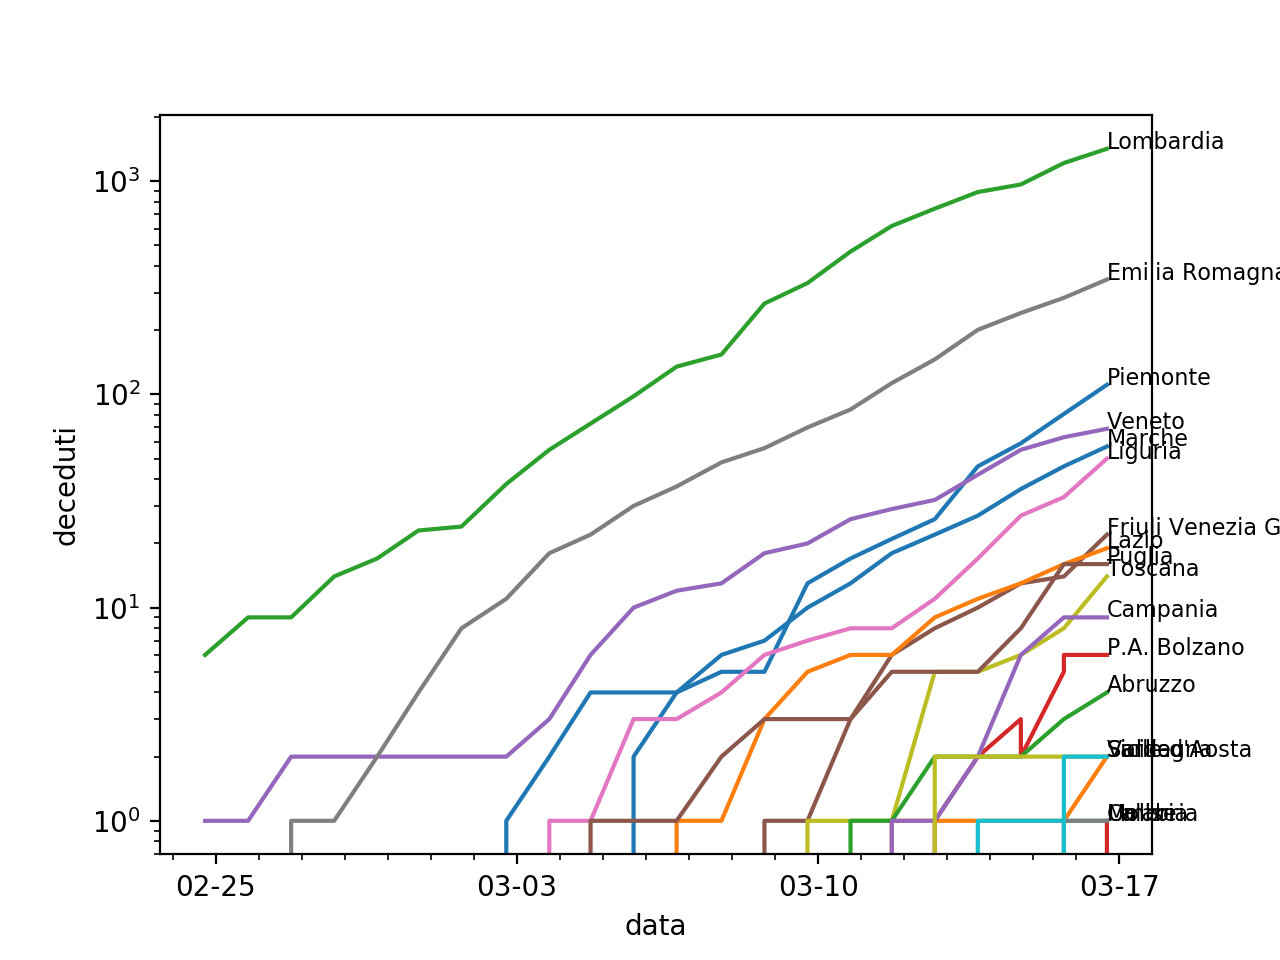

In [93]:
ObsX='data'
ObsY='deceduti' 

#'ricoverati_con_sintomi'
#'terapia_intensiva'
#'totale_ospedalizzati'
#'isolamento_domiciliare'
#'totale_attualmente_positivi'
#'nuovi_attualmente_positivi'
#'dimessi_guariti'
#'deceduti'
#'totale_casi'
#'tamponi'

scaleX='log'
scaleY='log'

size_lab=8

%matplotlib notebook

if ObsX=='data':
    plt.gca().xaxis.set_major_locator(mdates.WeekdayLocator())
    plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%m-%d'))
    plt.gca().xaxis.set_minor_locator(mdates.DayLocator())
else:
    plt.xscale(scaleX)
    
plt.yscale(scaleY)

plt.xlabel(ObsX)
plt.ylabel(ObsY)

for r in range(1,21):
    Reg=DataRegions.loc[DataRegions['codice_regione'] == r]
   
    plt.plot(Reg[ObsX],Reg[ObsY])
    plt.text(Reg[ObsX].iloc[-1],Reg[ObsY].iloc[-1],Reg['denominazione_regione'].iloc[0],fontsize=size_lab)

## Province

<IPython.core.display.Javascript object>


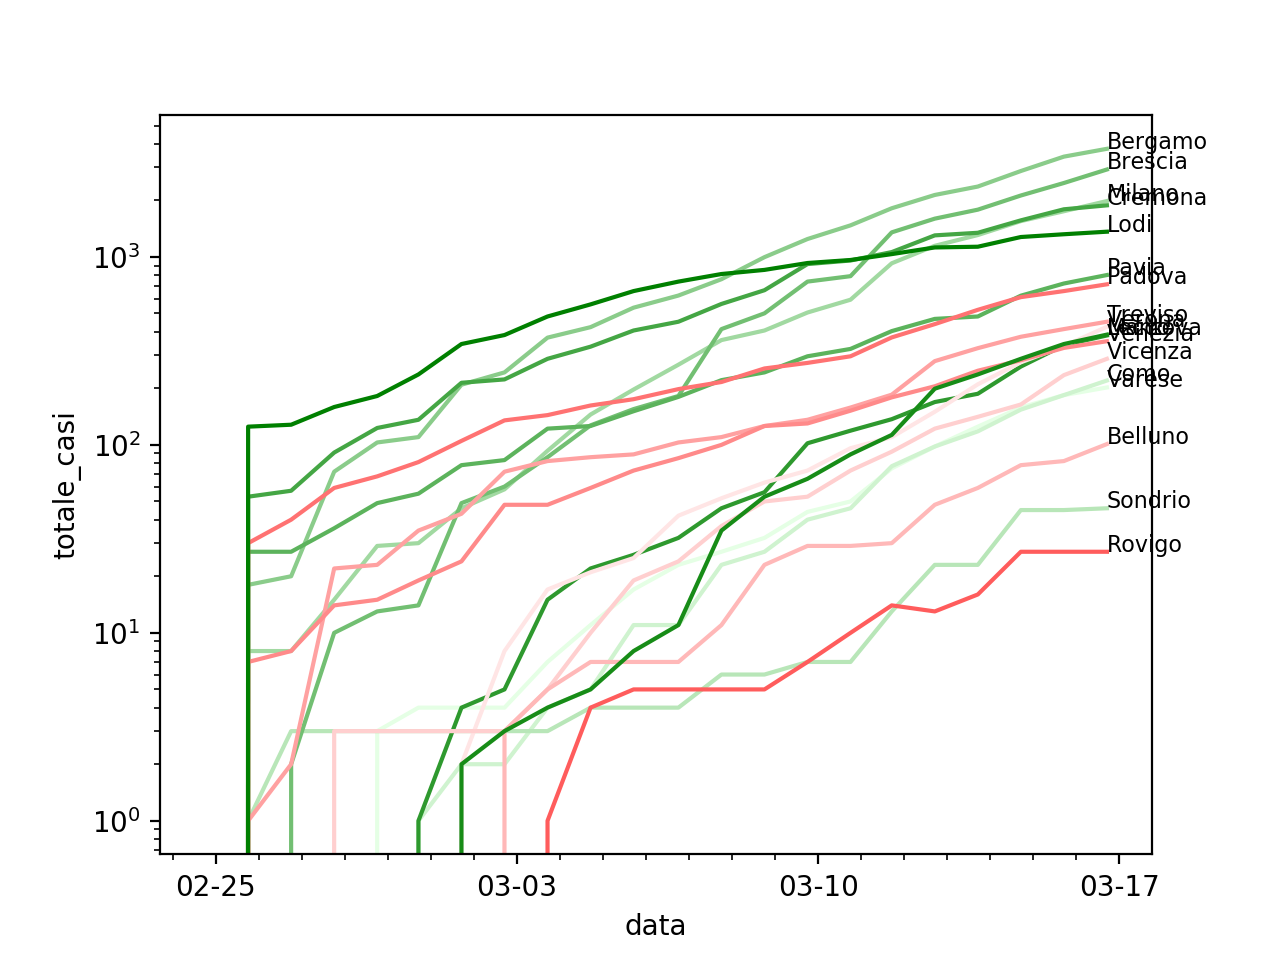

In [86]:
ObsX='data'
ObsY='totale_casi'

scaleX='log'
scaleY='log'

size_lab=8

%matplotlib notebook

if ObsX=='data':
    plt.gca().xaxis.set_major_locator(mdates.WeekdayLocator())
    plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%m-%d'))
    plt.gca().xaxis.set_minor_locator(mdates.DayLocator())
else:
    plt.xscale(scaleX)
    
plt.yscale(scaleY)

plt.xlabel(ObsX)
plt.ylabel(ObsY)

cV=0;cL=0;cE=0;cLa=0;

for p in range(1,103):
    Prv=DataProvinces.loc[DataProvinces['codice_provincia'] == p]
    
    pal=sns.light_palette("red",11)
    if Prv['denominazione_regione'].iloc[0]=='Veneto':
        plt.plot(Prv[ObsX],Prv[ObsY],c=pal[cV])
        plt.text(Prv[ObsX].iloc[-1],Prv[ObsY].iloc[-1],Prv['denominazione_provincia'].iloc[0],fontsize=size_lab)
        cV+=1
        
    pal=sns.light_palette("green",11)
    if Prv['denominazione_regione'].iloc[0]=='Lombardia':
        plt.plot(Prv[ObsX],Prv[ObsY],c=pal[cL])
        plt.text(Prv[ObsX].iloc[-1],Prv[ObsY].iloc[-1],Prv['denominazione_provincia'].iloc[0],fontsize=size_lab)
        cL+=1

## World

<IPython.core.display.Javascript object>


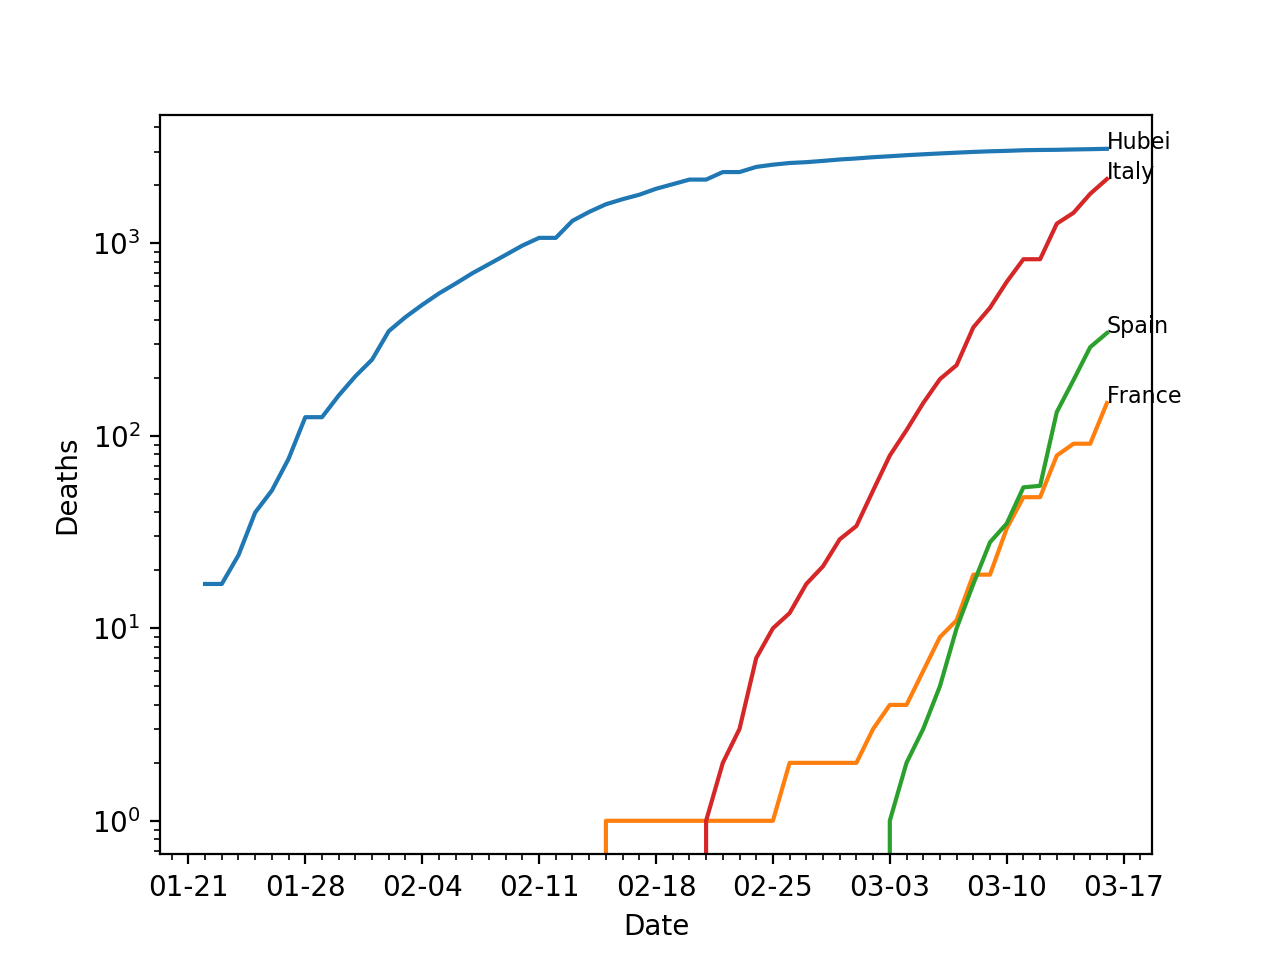

In [101]:
ObsX='Date'
ObsY='Deaths'

scaleX='log'
scaleY='log'

size_lab=8

%matplotlib notebook

if ObsX=='Last Update' or ObsX=='Date':
    plt.gca().xaxis.set_major_locator(mdates.WeekdayLocator())
    plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%m-%d'))
    plt.gca().xaxis.set_minor_locator(mdates.DayLocator())
else:
    plt.xscale(scaleX)
    
plt.yscale(scaleY)

plt.xlabel(ObsX)
plt.ylabel(ObsY)

state='Hubei'
Cty = DataWorld.loc[DataWorld['Province/State'] == state]
plt.plot(Cty[ObsX],Cty[ObsY])
plt.text(Cty[ObsX].iloc[-1],Cty[ObsY].iloc[-1],state,fontsize=size_lab)

state = 'France'
Cty = DataWorld.loc[DataWorld['Country/Region'] == state]
Cty = Cty[(Cty['Province/State']==state) | (Cty['Province/State'].isnull())]
plt.plot(Cty[ObsX],Cty[ObsY])
plt.text(Cty[ObsX].iloc[-1],Cty[ObsY].iloc[-1],state,fontsize=size_lab)

for country in ['Spain','Italy']:
    Cty = DataWorld.loc[DataWorld['Country/Region'] == country]
    plt.plot(Cty[ObsX],Cty[ObsY])
    plt.text(Cty[ObsX].iloc[-1],Cty[ObsY].iloc[-1],country,fontsize=size_lab)


In [102]:
DataWorld.loc[DataWorld['Country/Region'] == 'Italy']

,Confirmed,Country/Region,Date,Deaths,Last Update,Latitude,Longitude,Province/State,Recovered
49,2.0,Italy,2020-01-31,NaN,2020-01-31 23:59:00,NaN,NaN,NaN,NaN
46,2.0,Italy,2020-02-01,0.0,2020-01-31 08:15:00,NaN,NaN,NaN,0.0
48,2.0,Italy,2020-02-02,0.0,2020-01-31 08:15:53,NaN,NaN,NaN,0.0
48,2.0,Italy,2020-02-03,0.0,2020-01-31 08:15:53,NaN,NaN,NaN,0.0
48,2.0,Italy,2020-02-04,0.0,2020-01-31 08:15:53,NaN,NaN,NaN,0.0
49,2.0,Italy,2020-02-05,0.0,2020-01-31 08:15:53,NaN,NaN,NaN,0.0
49,2.0,Italy,2020-02-06,0.0,2020-01-31 08:15:53,NaN,NaN,NaN,0.0
48,3.0,Italy,2020-02-07,0.0,2020-02-07 17:53:02,NaN,NaN,NaN,0.0
48,3.0,Italy,2020-02-08,0.0,2020-02-07 17:53:02,NaN,NaN,NaN,0.0
48,3.0,Italy,2020-02-09,0.0,2020-02-07 17:53:02,NaN,NaN,NaN,0.0
